In [8]:
from bs4 import BeautifulSoup
import requests
import os
import re
from IPython.display import Image

In [6]:
def gettydownl(gettysearch, page_no=1):

    path = os.getcwd()
    path = os.path.join(path, str(gettysearch))
    os.mkdir(path)
    
    for i in range(1, page_no+1):
        url = 'https://www.gettyimages.in/search/2/image?phrase='+str(gettysearch)+'&page='+str(i)
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        
        imagelinks = soup.find_all('img', class_ = 'gallery-asset__thumb gallery-mosaic-asset__thumb')
    
        for links in imagelinks:
            link = links['src'].split('?')[0]+'?s=2048x2048'
            desc = links['alt']
            newdesc = re.sub('[^A-Za-z0-9]+',' ',desc)

            save_as = os.path.join(path, str(newdesc)+'.jpg')

            with open(save_as,'wb') as f:
                getyimg = requests.get(link)
                f.write(getyimg.content)
    print('Images Downloaded')

In [9]:
gettydownl('messi',2)

Images Downloaded


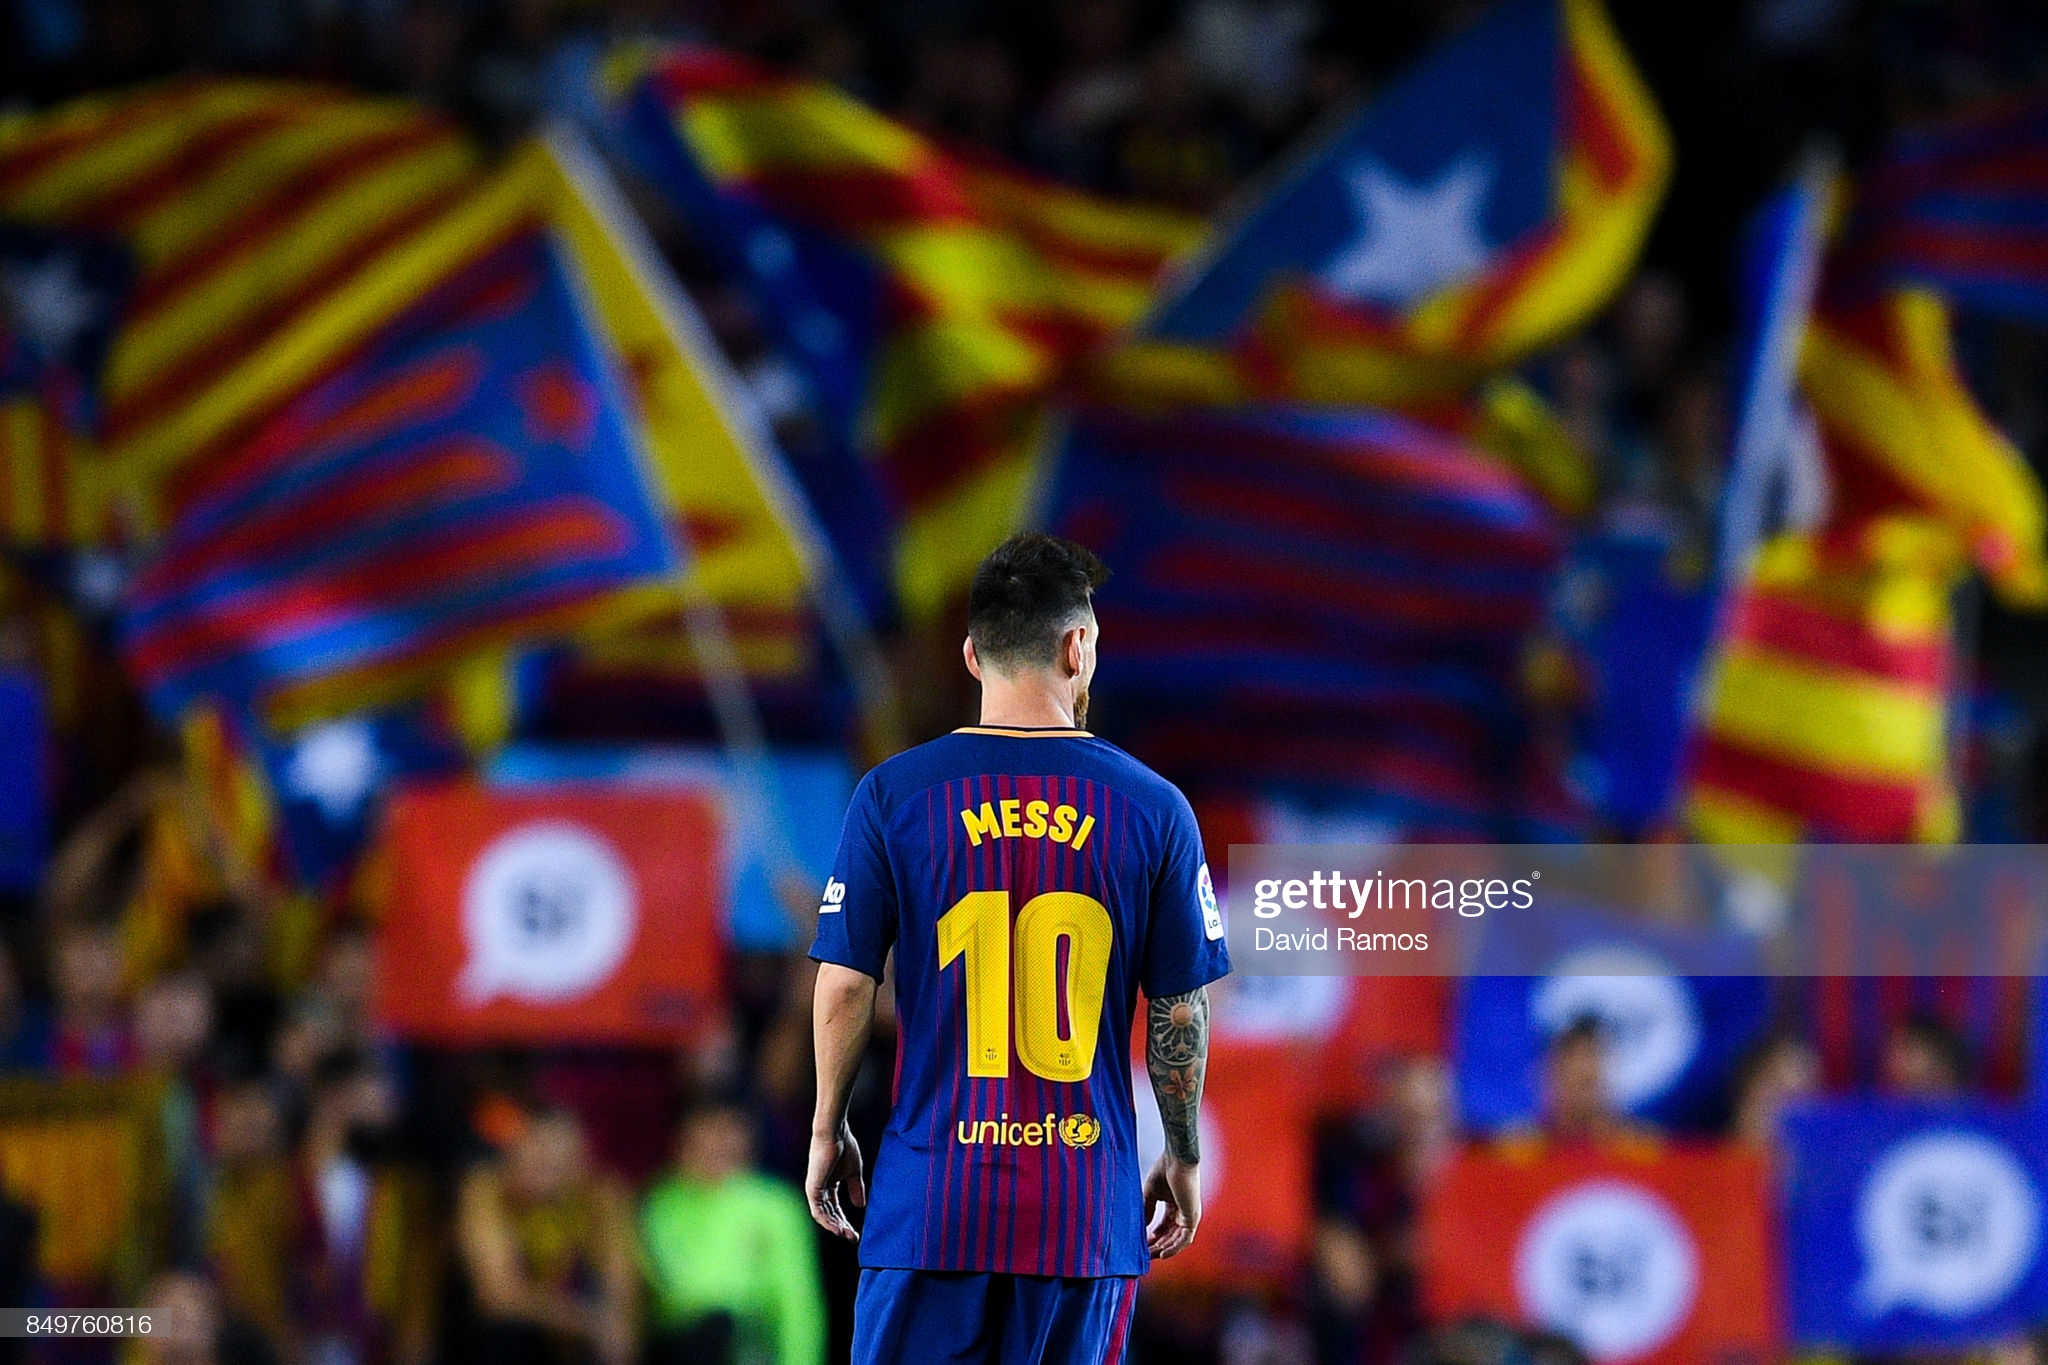

In [12]:
Image(filename='D:\Personal Projects\GettyImage downloader\messi\Lionel Messi of FC Barcelona looks on as Catalan Pro Independence flags are seen on the background during the La Liga match between Barcelona and SD .jpg')